## Задача.

В некоторой комнании менеджер по подбору персонала разбирал полученные отклики на вакансию. Описание вакансии содержало одно небольшое задание для соискателей, которое проверяло внимательное прочтение ваканисии перед откликом и способности решить несложную логическую задачу и доступно изложить решение.

В процессе просмотра откликов менеджер вел небольшой Excel-файл, где фиксировал краткую информацию по каждому соискателю. В какой-то момент менеджеру по подбору персонала начало *казаться*, что есть связь между возрастом соискателей и наличием решения задачи в сопроводительном письме.

Перед тем как передать результаты скриннинга нанимающему менеджеру, менеджер по подбору персонала решил поделиться своими мыслями о связи возраста с наличием решения. Для этого он попросил аналитика данных построить график, который подтвердил бы его догадки.

Однако аналитик не стал доверять тому, что *показалось* менеджеру по подбору персонала и решил все перепроверить и самостоятельно сделать вывод. Как они договорились, аналитик вернулся ровно с одним графиком и коротким (длинной в 1 твит) комментарием к графику.

-------

Собственно, представьте себя в роли аналитика и сделайте **только 1 график и короткий комментарий** (длинной <= 1 твит), которыми вы бы хотели наилучшим образом описать данные из файла **data.csv** (находится в этой же папке).

Преобразования от сырых данных к результату вы можете передать в **jupyter notebook** файле, чтобы можно было отследить логику манипуляций с данными.

-------

P.S. Все персонажи вымышлены и любые совпадения случайны.

-------

Готовы подождать ваше решение до пятницы включительно (22 ноября), но только, пожалуйста, не тратьте на него всю неделю - оно делается достаточно быстро.

Решение вы можете отправить ссылкой на Google Drive (предпочтительнее) или ipynb файл на почту . Во втором случае, пожалуйста, напишите в чате на hh.ru, что вы отправили ответ на имейл и укажите ваш имеил, с которого вы отправили, чтобы ответ не потерялся.

In [ ]:
import pandas as pd
! pip install phik
import phik
from phik.report import plot_correlation_matrix
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 17.1 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('/content/data(6).csv')
df

,applicant_name,Age,Ответ на вопрос
0,name_0,49.0,нет
1,name_1,37.0,да
2,name_2,18.0,нет
3,name_3,36.0,неверное решение
4,name_4,31.0,да
...,...,...,...
320,name_320,19.0,нет
321,name_321,21.0,нет
322,name_322,33.0,нет
323,name_323,22.0,да


In [ ]:
#посмотрим на данные
df.describe()

,Age
count,281.000000
mean,26.800712
std,11.999232
min,15.000000
25%,21.000000
50%,24.000000
75%,31.000000
max,186.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   applicant_name   325 non-null    object 
 1   Age              281 non-null    float64
 2   Ответ на вопрос  325 non-null    object 
dtypes: float64(1), object(2)
memory usage: 7.7+ KB


Видим,что у нас имеются Nan значения,а также в категории возраст есть значение 186.

In [ ]:
df[df['Age']>100]

,applicant_name,Age,Ответ на вопрос
310,name_310,186.0,нет


Удалим выброс с возрастом 186,удалим Nan значения,сделаем ответ на вопрос категориальная переменной,будем считать что любой ответ кроме да это 0,а да это 1

In [ ]:
# Удаление строк, где Age > 100
df = df[df['Age'] <= 100]
# Удаляем строки с NaN
df = df.dropna()
# Преобразуем в бинарные значения
df['Ответ на вопрос'] = df['Ответ на вопрос'].apply(lambda x: 1 if x.lower() == 'да' else 0)
# Преобразуем Age в числовой тип
df['Age'] = df['Age'].astype(int)
df = df.dropna()  # Снова удаляем строки с NaN после преобразования
df


,applicant_name,Age,Ответ на вопрос
0,name_0,49,0
1,name_1,37,1
2,name_2,18,0
3,name_3,36,0
4,name_4,31,1
...,...,...,...
319,name_319,30,1
320,name_320,19,0
321,name_321,21,0
322,name_322,33,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 0 to 323
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   applicant_name   280 non-null    object
 1   Age              280 non-null    int64 
 2   Ответ на вопрос  280 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.8+ KB


                      Age  Ответ на вопрос
Age              1.000000         0.179906
Ответ на вопрос  0.179906         1.000000


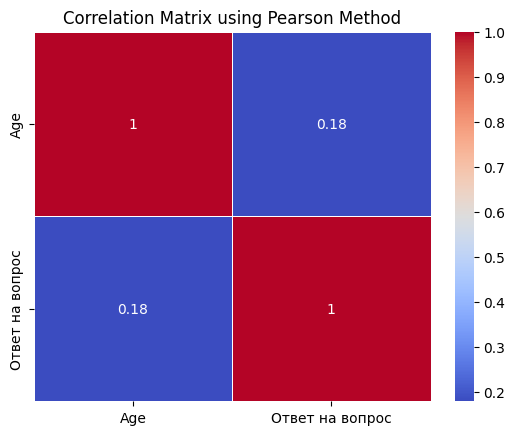

interval columns not set, guessing: ['Age', 'Ответ на вопрос']
                      Age  Ответ на вопрос
Age              1.000000         0.300168
Ответ на вопрос  0.300168         1.000000


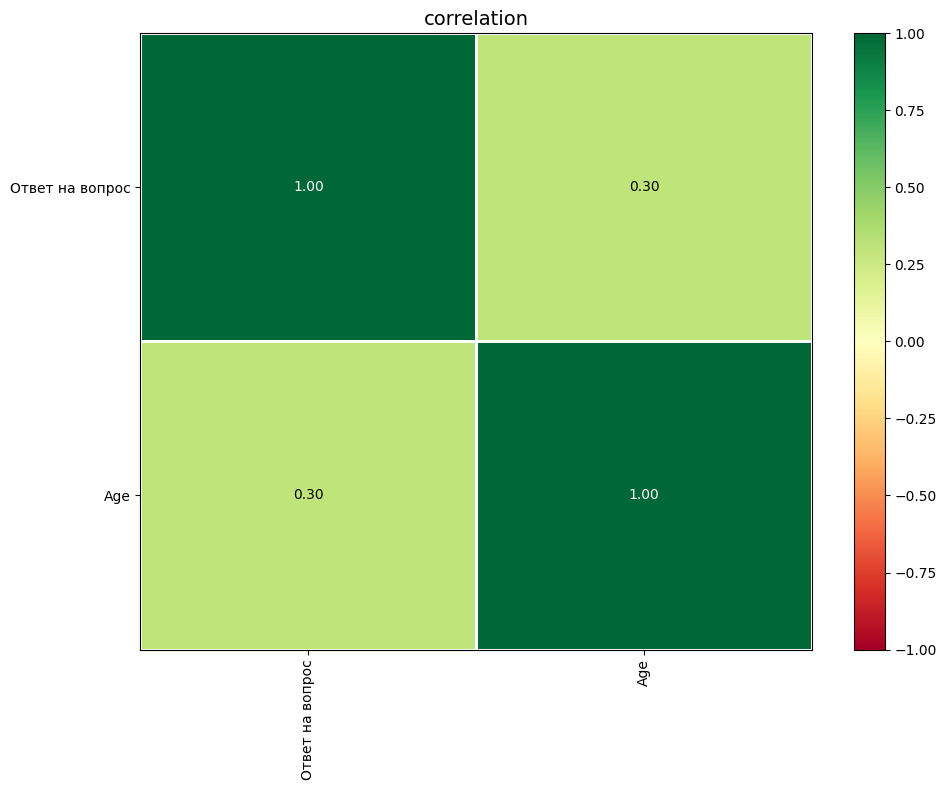

In [ ]:
#Посмотрим на корреляцию сразу.Будем использовать стандартную pandas и phik
corr_matrix = df[['Age', 'Ответ на вопрос']].corr()
print(corr_matrix)

# Визуализация корреляционной матрицы с pandas
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix using Pearson Method')
plt.show()

# Шаг 3: Построение корреляционной матрицы с помощью phik
phik_matrix = df[['Age', 'Ответ на вопрос']].phik_matrix()  # Корреляции с phik
print(phik_matrix)

# Визуализация корреляционной матрицы с phik
plot_correlation_matrix(phik_matrix.values, x_labels=phik_matrix.columns, y_labels=phik_matrix.index, figsize=(10, 8))
plt.show()


Да действительно,наблюдается не сильная корреляция между признаками.

Попробуем изучить подробнее.Сделам разбивку по возрастам и посмтрим количество участников в каждой группе,а далее посмтрим на корреляцию в них.

<ipython-input-28-7e5600662764>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['AgeRange', 'Ответ на вопрос']).size().unstack(fill_value=0)


Ответ на вопрос   0   1
AgeRange               
0-20             32   7
21-30            87  75
31-40            33  31
41-50             6   7
51-60             1   0
61-70             0   1
71-80             0   0
81-90             0   0
91-100            0   0


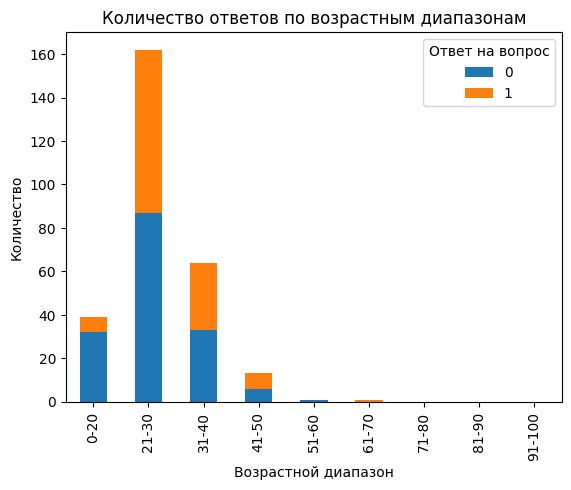

In [ ]:
# Создание возрастных диапазонов
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['AgeRange'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Группировка данных
grouped = df.groupby(['AgeRange', 'Ответ на вопрос']).size().unstack(fill_value=0)
print(grouped)

# Визуализация данных
grouped.plot(kind='bar', stacked=True)
plt.title('Количество ответов по возрастным диапазонам')
plt.xlabel('Возрастной диапазон')
plt.ylabel('Количество')
plt.show()


Пока можно сделать выввод что большая часть участников в возрасте 21-30.И они выполняют задание примерно в равных долях,так же и группа 31-40,41-50

In [ ]:
value_counts = df['Ответ на вопрос'].value_counts()
value_counts

,count
Ответ на вопрос,
0,159
1,121


In [ ]:
# Фильтрация данных для возрастного диапазона 21-30
df_0_20 = df[df['AgeRange'] == '0-20']
df_21_30 = df[df['AgeRange'] == '21-30']
df_31_40 = df[df['AgeRange'] == '31-40']
df_41_50 = df[df['AgeRange'] == '41-50']
# Вычисление корреляции
corr_0_20 = df_0_20[['Age', 'Ответ на вопрос']].corr()
corr_21_30 = df_21_30[['Age', 'Ответ на вопрос']].corr()
corr_31_40 = df_31_40[['Age', 'Ответ на вопрос']].corr()
corr_41_50 = df_41_50[['Age', 'Ответ на вопрос']].corr()

print(f"Корреляция для возрастного диапазона 0-20:\n{corr_0_20}")
print(f"Корреляция для возрастного диапазона 21-30:\n{corr_21_30}")
print(f"Корреляция для возрастного диапазона 31-40:\n{corr_31_40}")
print(f"Корреляция для возрастного диапазона 41-50:\n{corr_41_50}")

Корреляция для возрастного диапазона 0-20:
                      Age  Ответ на вопрос
Age              1.000000         0.186475
Ответ на вопрос  0.186475         1.000000
Корреляция для возрастного диапазона 21-30:
                      Age  Ответ на вопрос
Age              1.000000         0.216706
Ответ на вопрос  0.216706         1.000000
Корреляция для возрастного диапазона 31-40:
                      Age  Ответ на вопрос
Age              1.000000         0.198832
Ответ на вопрос  0.198832         1.000000
Корреляция для возрастного диапазона 41-50:
                      Age  Ответ на вопрос
Age              1.000000        -0.606254
Ответ на вопрос -0.606254         1.000000


Да мы видим,что корреляция растет с возрастом но до определенного момента.В группе 31-40 меньше чем 21-30,а в группе 41-50 вообще отрицательная. Корреляцию нельзя назвать существенной(т.к <50%)

И можно предположить,если количество участников в группе 21-30 будет расти по сравнению с количеством в других группах и они также будут отвечать,то и корреляция будет расти.Если будет расти более возрастная группа и они будут также отвечать,то корреляция будет падать. Если более возрастная будет положительно отвечать(1),то корреляция будет расти,если будут отвечать отрицательно(0) то и корреляция будет падать.

Протестируем эту теорию,и добавим 4 участников в возрасте 41-50 с равными ответами 1 и 0.

In [ ]:
# Новые значения
new_data = {
    'applicant_name': ['name_700', 'name_701','name_702', 'name_703'],
    'Age': [49, 50,48,51],
    'Ответ на вопрос': ['0', '1','0','1']
}
new_df = pd.DataFrame(new_data)

# Добавляем новые строки в DataFrame
df = pd.concat([df, new_df], ignore_index=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   applicant_name   284 non-null    object
 1   Age              284 non-null    int64 
 2   Ответ на вопрос  284 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.8+ KB


In [ ]:
df['Ответ на вопрос'] = df['Ответ на вопрос'].astype(int)


                      Age  Ответ на вопрос
Age              1.000000         0.174535
Ответ на вопрос  0.174535         1.000000


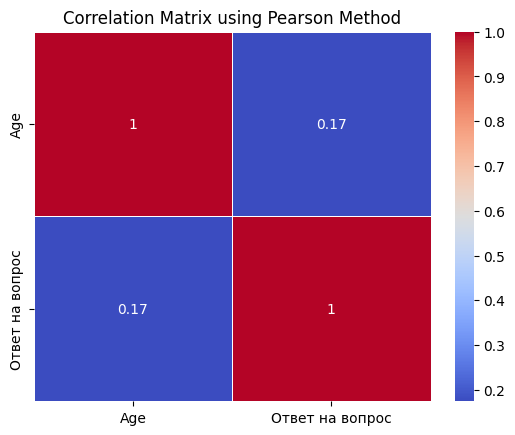

interval columns not set, guessing: ['Age', 'Ответ на вопрос']
                      Age  Ответ на вопрос
Age              1.000000         0.306462
Ответ на вопрос  0.306462         1.000000


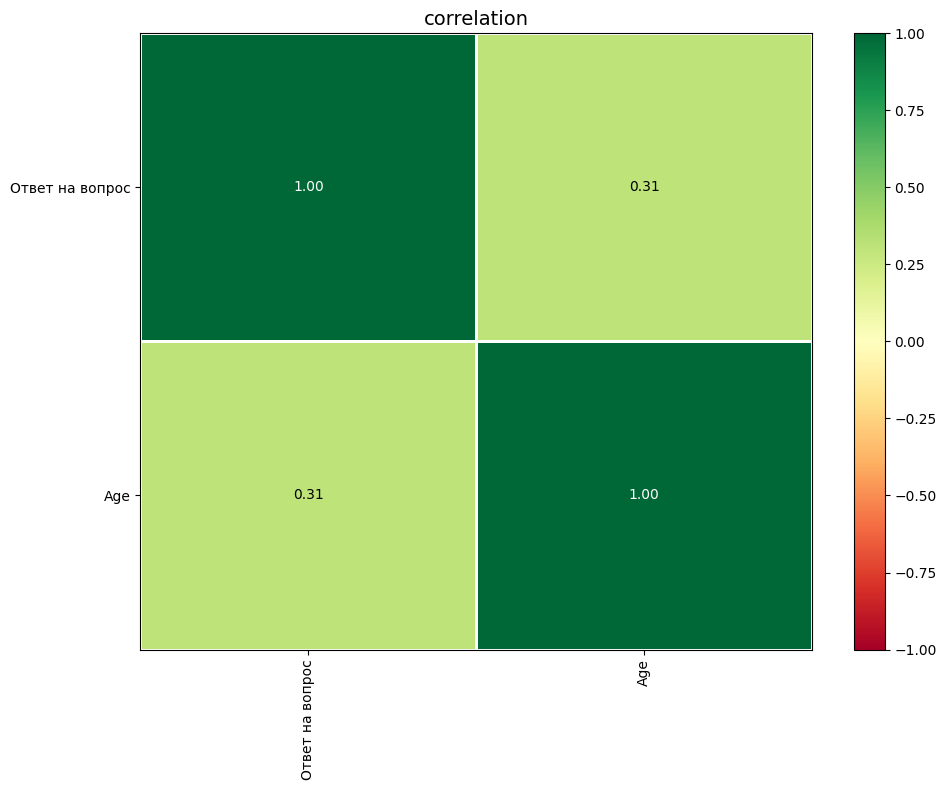

In [ ]:
#Посмотрим на корреляцию сразу.Будем использовать стандартную pandas и phik
corr_matrix = df[['Age', 'Ответ на вопрос']].corr()
print(corr_matrix)

# Визуализация корреляционной матрицы с pandas
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix using Pearson Method')
plt.show()

# Шаг 3: Построение корреляционной матрицы с помощью phik
phik_matrix = df[['Age', 'Ответ на вопрос']].phik_matrix()  # Корреляции с phik
print(phik_matrix)

# Визуализация корреляционной матрицы с phik
plot_correlation_matrix(phik_matrix.values, x_labels=phik_matrix.columns, y_labels=phik_matrix.index, figsize=(10, 8))
plt.show()

Видим корреляция немного снизилась с 0.179906 до  0.174535. Phik напротив подрос так как фиксирует не только линейную связь

Вывод: скорее всего у нас гетерогенность выборки-когда выборка неоднородна, различные подгруппы данных могут показывать разные или противоположные корреляции. У нас например большая часть участников в возрастной группе 21-30 и с положительной корреляций а более возрастная 41-50 лет с отрицательной.

 1 график и короткий комментарий (длинной <= 1 твит).
"Нанимающему менеджеру прочитать про гетерогенность выборки"

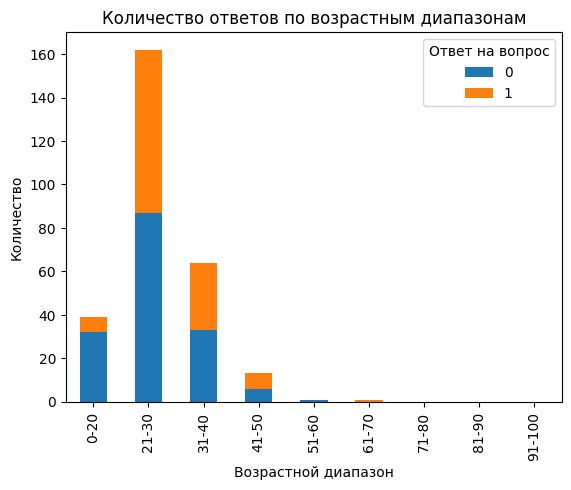

In [ ]:
# Визуализация данных
grouped.plot(kind='bar', stacked=True)
plt.title('Количество ответов по возрастным диапазонам')
plt.xlabel('Возрастной диапазон')
plt.ylabel('Количество')
plt.show()